In [1]:
import pandas as pd
import altair_recipes as ar

# Exercise 1

In these exercises you'll work with a dataset of employment rates in Europe by age and sex from [Eurostat](http://ec.europa.eu/eurostat/data/database)

The dataset `pandas_panel/employ.csv` can be downloaded [here](https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/employ.csv)

Reading in the csv file returns a panel dataset in long format. Use `.pivot_table()` to construct a wide format dataframe with a `MultiIndex` in the columns.

Start off by exploring the dataframe and the variables available in the `MultiIndex` levels

Write a program that quickly returns all the values in the `MultiIndex`

In [2]:
url = 'https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/employ.csv'
df = (
    pd.read_csv(url, parse_dates=['DATE'])
    .drop(columns='Unnamed: 0')
    .dropna()
    .pivot_table(index='DATE', columns=['GEO', 'AGE', 'UNIT', 'SEX', 'INDIC_EM'], values='Value')
)
df.head()

GEO                               Austria  \
AGE                   From 15 to 24 years   
UNIT       Percentage of total population   
SEX                               Females   
INDIC_EM                Active population   
DATE                                        
2007-01-01                           56.0   
2008-01-01                           56.2   
2009-01-01                           56.2   
2010-01-01                           54.0   
2011-01-01                           54.8   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               50.6     
2008-01-01                                               51.3     
2009-01-01                                               50.5     
2010-01-01                                               48.9     
2011-01-01                                               49.8     

GEO                           \
AGE                            
UNIT                           
SEX                    Males   
INDIC_EM   Active population   
DATE                           
2007-01-01              62.9   
2008-01-01              62.9   
2009-01-01              62.9   
2010-01-01              62.6   
2011-01-01              63.6   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               57.0     
2008-01-01                                               57.6     
2009-01-01                                               55.8     
2010-01-01                                               56.6     
2011-01-01                                               58.0     

GEO                           \
AGE                            
UNIT                           
SEX                    Total   
INDIC_EM   Active population   
DATE                           
2007-01-01              59.4   
2008-01-01              59.5   
2009-01-01              59.5   
2010-01-01              58.3   
2011-01-01              59.2   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               53.8     
2008-01-01                                               54.4     
2009-01-01                                               53.1     
2010-01-01                                               52.8     
2011-01-01                                               53.9     

GEO                           \
AGE                            
UNIT        Thousand persons   
SEX                  Females   
INDIC_EM   Active population   
DATE                           
2007-01-01             278.0   
2008-01-01             279.0   
2009-01-01             279.0   
2010-01-01             267.0   
2011-01-01             270.0   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                           

In [4]:
for level in df.columns.levels:
    print(level.name)
    print(level.tolist())
    print()    

GEO
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (17 countries)', 'Euro area (18 countries)', 'Euro area (19 countries)', 'European Union (15 countries)', 'European Union (27 countries)', 'European Union (28 countries)', 'Finland', 'Former Yugoslav Republic of Macedonia, the', 'France', 'France (metropolitan)', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

AGE
['From 15 to 24 years', 'From 25 to 54 years', 'From 55 to 64 years']

UNIT
['Percentage of total population', 'Thousand persons']

SEX
['Females', 'Males', 'Total']

INDIC_EM
['Active population', 'Total employment (resident population concept - LFS)']



I don't actually like working with Multindices for data like this. See [tidy data](http://vita.had.co.nz/papers/tidy-data.pdf) for a discussion of the benefits of long or "tidy" format to data.

Here's an implementation that allows us to examine the values without pivoting.

In [5]:
df = (
    pd.read_csv(url, parse_dates=['DATE'])
    .drop(columns='Unnamed: 0')
    .dropna()
)

In [6]:
panel_col_names = [col for col in df.columns.tolist() if col not in ['Value', 'DATE']]
for col in panel_col_names:
    print(col)
    print(df[col].unique())
    print()

GEO
['European Union (28 countries)' 'European Union (27 countries)'
 'European Union (15 countries)' 'Euro area (19 countries)'
 'Euro area (18 countries)' 'Euro area (17 countries)' 'Belgium'
 'Bulgaria' 'Czech Republic' 'Denmark'
 'Germany (until 1990 former territory of the FRG)' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France (metropolitan)' 'Croatia' 'Italy' 'Cyprus'
 'Latvia' 'Lithuania' 'Luxembourg' 'Hungary' 'Malta' 'Netherlands'
 'Austria' 'Poland' 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland'
 'Sweden' 'United Kingdom' 'Iceland' 'Norway'
 'Former Yugoslav Republic of Macedonia, the' 'Turkey' 'Switzerland'
 'France']

AGE
['From 15 to 24 years' 'From 25 to 54 years' 'From 55 to 64 years']

UNIT
['Thousand persons' 'Percentage of total population']

SEX
['Total' 'Males' 'Females']

INDIC_EM
['Active population'
 'Total employment (resident population concept - LFS)']



# Exercise 2

Filter the above dataframe to only include employment as a percentage of 'active population'

Create a grouped boxplot using `altair` of employment rates in 2015 by age group and sex

**Hint** `GEO` includes both areas and countries

In [7]:
countries = [geo for geo in df['GEO'].unique().tolist() if not geo.startswith('Euro')]

mask = (
    (df['GEO'].isin(countries)) &
    (df['UNIT'] == 'Percentage of total population') &
    (df['INDIC_EM'] == 'Active population') &
    (df['SEX'] != 'Total') &
    (df['DATE'] == '2015')
)
chart_df = df.loc[mask].copy()
chart_df.head()

,GEO,AGE,UNIT,SEX,INDIC_EM,Value,DATE
12320,Belgium,From 15 to 24 years,Percentage of total population,Males,Active population,32.8,2015-01-01
12322,Belgium,From 15 to 24 years,Percentage of total population,Females,Active population,27.1,2015-01-01
12332,Belgium,From 25 to 54 years,Percentage of total population,Males,Active population,89.9,2015-01-01
12334,Belgium,From 25 to 54 years,Percentage of total population,Females,Active population,80.2,2015-01-01
12344,Belgium,From 55 to 64 years,Percentage of total population,Males,Active population,52.2,2015-01-01


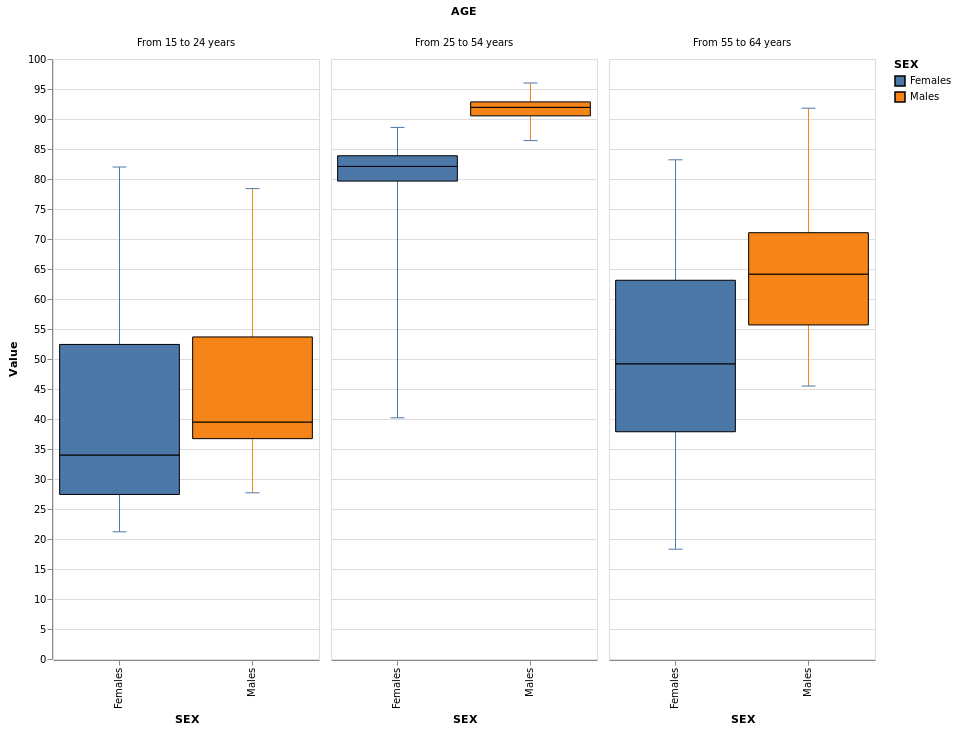

In [8]:
ar.boxplot(chart_df, columns='Value', group_by='SEX', color=True, width= 800 // len(chart_df['AGE'].unique())).facet(column='AGE')